In [ ]:
import pandas as pd
from collections import Counter

In [ ]:
from fastai import *
from fastai.tabular import *
from fastai.tabular.data import *

In [ ]:
path = './drive/MyDrive/Materiale_Pellegrino_personal/CIDDS_Meta/CIDDS_Meta.csv'
dataset = pd.read_csv(path)

### ***PRE-ELABORAZIONE DATI***

In [ ]:
dataset

,Duration,Proto,Packets,Bytes,Flows,Flags,Tos,multilabel
0,0.245,TCP,2,670,1,.AP...,0,normal
1,0.000,TCP,1,66,1,.A....,0,normal
2,0.000,TCP,1,58,1,....S.,0,portScan
3,0.000,TCP,1,58,1,....S.,0,portScan
4,0.047,TCP,11,1027,1,.AP...,0,normal
...,...,...,...,...,...,...,...,...
399995,0.034,TCP,2,598,1,.AP...,0,normal
399996,0.000,TCP,1,95,1,.AP...,32,normal
399997,0.005,TCP,5,479,1,.AP.SF,0,dos
399998,0.000,TCP,1,66,1,.A...F,32,normal


In [ ]:
print('Duration: ', Counter(dataset['Duration']))
print('Proto: ', Counter(dataset['Proto']))
print('Packets: ', Counter(dataset['Packets']))
print('Bytes: ', Counter(dataset['Bytes']))
print('Flows: ', Counter(dataset['Flows']))
print('Flags: ', Counter(dataset['Flags']))
print('Tos: ', Counter(dataset['Tos']))
print('multilabel: ', Counter(dataset['multilabel']))

Duration:  Counter({0.0: 181209, 0.004: 29067, 0.003: 27985, 0.005: 23460, 0.002: 20437, 0.006: 12986, 0.001: 10940, 0.006999999999999999: 4709, 0.036000000000000004: 1537, 0.035: 1506, 0.026000000000000002: 1473, 0.025: 1350, 0.027000000000000003: 1312, 0.037000000000000005: 1258, 0.008: 1254, 0.034: 1242, 0.024: 1208, 0.027999999999999997: 1005, 0.038: 1003, 0.033: 960, 0.018000000000000002: 960, 0.017: 943, 0.023: 902, 0.019: 842, 0.032: 831, 0.016: 810, 0.028999999999999998: 784, 0.02: 754, 0.03: 742, 0.009000000000000001: 707, 0.031: 694, 0.022000000000000002: 683, 0.039: 661, 0.015: 618, 0.021: 609, 0.01: 555, 0.04: 544, 0.042: 454, 0.040999999999999995: 452, 0.065: 397, 0.043: 395, 0.049: 383, 0.05: 380, 0.066: 370, 0.045: 368, 0.048: 363, 0.064: 362, 0.044000000000000004: 361, 0.013999999999999999: 353, 0.051: 346, 0.011000000000000001: 345, 0.047: 338, 0.053: 328, 0.052000000000000005: 321, 0.063: 312, 0.07400000000000001: 310, 0.067: 308, 0.075: 307, 0.046: 296, 0.10400000000

- Flows da eliminare


In [ ]:
from sklearn.model_selection import train_test_split

# train 50% e test 50%
train, test = train_test_split(dataset, test_size=0.50)

In [ ]:
print('multilabel_Train: ', Counter(train['multilabel']))
print('multilabel_Test: ', Counter(test['multilabel']))

multilabel_Train:  Counter({'normal': 121833, 'dos': 58916, 'portScan': 18750, 'pingScan': 323, 'bruteForce': 178})
multilabel_Test:  Counter({'normal': 121530, 'dos': 58988, 'portScan': 18973, 'pingScan': 323, 'bruteForce': 186})


In [ ]:
from sklearn.preprocessing import LabelEncoder

y_train = LabelEncoder().fit_transform(train['multilabel'])
y_test = LabelEncoder().fit_transform(test['multilabel'])

# elimino le colonne dal dataset di test
test = test.drop('multilabel', axis=1)

# LabelEncoder in train di multilabel
target_index = train.columns.get_loc('multilabel')
train.iloc[:, target_index] = y_train

# La colonna Flows presenta tutti valori 1 -> inutile
test = test.drop('Flows', axis=1)
train = train.drop('Flows', axis=1)

In [ ]:
"""#### PROVO A CANCELLARE ALCUNE FEATURES ############
test = test.drop('Duration', axis=1)
train = train.drop('Duration', axis=1)

test = test.drop('Flags', axis=1)
train = train.drop('Flags', axis=1)

test = test.drop('Bytes', axis=1)
train = train.drop('Bytes', axis=1)"""

In [ ]:
print('Encod_multilabel_train: ', Counter(y_train))
print('Encod_multilabel_test: ', Counter(y_test))

Encod_multilabel_train:  Counter({2: 121833, 1: 58916, 4: 18750, 3: 323, 0: 178})
Encod_multilabel_test:  Counter({2: 121530, 1: 58988, 4: 18973, 3: 323, 0: 186})


In [ ]:
target_dict = {'bruteForce' : 0,
               'dos' : 1,
               'normal' : 2,
               'pingScan' : 3,
               'portScan' : 4}

In [ ]:
train.head()

,Duration,Proto,Packets,Bytes,Flags,Tos,multilabel
99234,0.005,TCP,6,545,.AP.SF,0,1
132138,0.000,TCP,1,66,.A....,32,2
281881,0.076,TCP,5,560,.AP.S.,0,2
214914,0.005,TCP,5,479,.AP.SF,0,1
216293,0.000,TCP,1,54,.A.R..,0,4


In [ ]:
test.head()

,Duration,Proto,Packets,Bytes,Flags,Tos
166867,0.000,TCP,1,108,.AP...,0
143044,0.150,TCP,160,12208,.AP.S.,0
8803,0.003,TCP,5,479,.AP.SF,0
286520,0.024,TCP,2,108,.A...F,32
34575,0.741,TCP,27,18942,.AP.S.,32


### ***MODEL***

In [ ]:
dep_var = 'multilabel'
cat_names = ["Proto", "Flags", 'Bytes']
#cat_names = ["Proto"]
cont_names = [col for col in train.columns if col not in cat_names and col != dep_var]
procs = [FillMissing, Categorify, Normalize]

In [ ]:
print('Cont variables: ', cont_names)
print('Cat variables: ', cat_names)

Cont variables:  ['Duration', 'Packets', 'Tos']
Cat variables:  ['Proto', 'Flags', 'Bytes']


In [ ]:
# Splitto il dataset in valid per avere 2500 righe
from sklearn.model_selection import train_test_split

def SplitSet(df):
     train, valid = train_test_split(df, test_size=0.0125)
     split_val = len(train)
     train = train.append(valid)
     return train, split_val

traindf, idx = SplitSet(train)

In [ ]:
# Lista da passare al nostro tabular learner per effettuare la fase di test
test = TabularList.from_df(test, cat_names= cat_names, cont_names=cont_names, procs=procs)

# Lista contenete gli insiemi di training e validation, necessari per l'addrestamento del modello
data = TabularList.from_df(traindf, cat_names= cat_names, cont_names=cont_names, procs=procs)
data = data.split_by_idx(list(range(idx, len(traindf))))
data = data.label_from_df(cols=dep_var)
data = data.add_test(test, label= 0)
data = data.databunch()

In [ ]:
# Creazione del nostro modello con due Hidden layers da, rispettivamente, 200 e 100 neuroni.
# Per valutare la performance durante l'addestramento viene usata l'accuratezza
learn = tabular_learner(data, layers=[200,100], metrics=accuracy, emb_drop=0.01, callback_fns=ShowGraph)

In [ ]:
learn

Learner(data=TabularDataBunch;

Train: LabelList (197500 items)
x: TabularList
Proto TCP  ; Flags .A..SF; Bytes 206; Duration -0.1403; Packets -0.0126; Tos -0.4782; ,Proto UDP  ; Flags ......; Bytes 169; Duration -0.1454; Packets -0.0148; Tos -0.4782; ,Proto TCP  ; Flags .AP.SF; Bytes 545; Duration -0.1386; Packets -0.0093; Tos -0.4782; ,Proto TCP  ; Flags .A....; Bytes 54; Duration -0.1454; Packets -0.0148; Tos -0.4782; ,Proto TCP  ; Flags .AP.SF; Bytes 545; Duration -0.1437; Packets -0.0093; Tos -0.4782; 
y: CategoryList
1,2,1,2,1
Path: .;

Valid: LabelList (2500 items)
x: TabularList
Proto TCP  ; Flags .AP.SF; Bytes 545; Duration -0.1369; Packets -0.0093; Tos -0.4782; ,Proto TCP  ; Flags .AP.S.; Bytes 1999; Duration 0.0194; Packets -0.0115; Tos 1.7878; ,Proto TCP  ; Flags ....S.; Bytes 58; Duration -0.1454; Packets -0.0148; Tos -0.4782; ,Proto TCP  ; Flags ....S.; Bytes 58; Duration -0.1454; Packets -0.0148; Tos -0.4782; ,Proto TCP  ; Flags ....S.; Bytes 58; Duration -0.1454; Packet

### ***TRAINING***

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


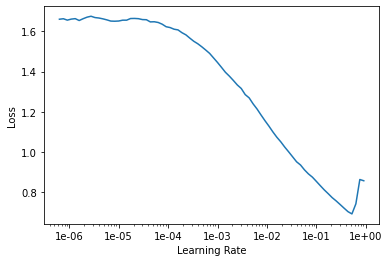

In [ ]:
"""Troviamo il valore di learning rate da utilizzare per l'algoritmo di discesa del gradiente. 
  Prendiamo un valore mediano rispetto al punto di max pendenza """
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.040595,15.887894,0.991600,02:33
1,0.012165,6.199903,0.994000,02:56


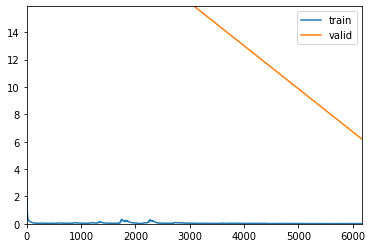

In [ ]:
# Addestramento del modello
learn.fit_one_cycle(2, 1e-01, wd=0.02)

### ***PREDICTION***

In [ ]:
# Valutazione del dataset di test ottenuto splittando il dataset di train
import numpy as np

pred, *_ = learn.get_preds(DatasetType.Test)
label = np.argmax(pred, 1)

y_pred = np.array(label)

16 sec per il test

In [ ]:
y_pred

array([2, 2, 1, 2, ..., 1, 2, 2, 2])

In [ ]:
print('Test:', Counter(y_test))
print('Pred:', Counter(y_pred))

Test: Counter({2: 121530, 1: 58988, 4: 18973, 3: 323, 0: 186})
Pred: Counter({2: 121406, 1: 58991, 4: 19018, 0: 438, 3: 147})


### ***EVALUATION***

In [ ]:
# Matrice di confusione, accuracy, classification_report
from sklearn.metrics import *

# y_test è la variabile che contiene i valori effettivi
# y_pred contiene i valori predetti dal modello
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
# non presente nella libreria, calcolo mediante formula
f2 = (1+2**2)*((precision*recall)/((2**2*precision)+recall))

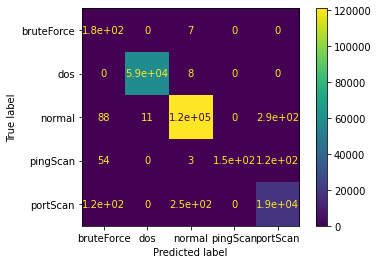

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

"""target_dict = {'Dos' : 0,
               'Probe' : 1,
               'normal' : 2,
               'r2l' : 3,
               'u2r' : 4}"""

disp = ConfusionMatrixDisplay(cm, target_dict)
disp.plot()

In [ ]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[[199555    259]
  [     7    179]]

 [[141001     11]
  [     8  58980]]

 [[ 78201    269]
  [   393 121137]]

 [[199677      0]
  [   176    147]]

 [[180614    413]
  [   368  18605]]]


In [ ]:
FP = cm.sum (axis = 0) - np.diag (cm) 
FN = cm.sum (axis = 1) - np.diag (cm) 
TP = np.diag (cm) 
TN = cm.sum () - (FP + FN + TP)

print('True positive: ', TP)
print('True negative: ', TN)
print('False positive: ', FP)
print('False negative: ', FN)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print('True positive rate: ', TPR)
print('True negative rate: ', TNR)
print('False positive rate: ', FPR)
print('False negative rate: ', FNR)

True positive:  [   179  58980 121137    147  18605]
True negative:  [199555 141001  78201 199677 180614]
False positive:  [259  11 269   0 413]
False negative:  [  7   8 393 176 368]
True positive rate:  [0.962366 0.999864 0.996766 0.455108 0.980604]
True negative rate:  [0.998704 0.999922 0.996572 1.       0.997719]
False positive rate:  [1.296205e-03 7.800755e-05 3.428062e-03 0.000000e+00 2.281428e-03]
False negative rate:  [3.763441e-02 1.356208e-04 3.233769e-03 5.448916e-01 1.939598e-02]


In [ ]:
print(cm)

[[   179      0      7      0      0]
 [     0  58980      8      0      0]
 [    88     11 121137      0    294]
 [    54      0      3    147    119]
 [   117      0    251      0  18605]]


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.41      0.96      0.57       186
           1       1.00      1.00      1.00     58988
           2       1.00      1.00      1.00    121530
           3       1.00      0.46      0.63       323
           4       0.98      0.98      0.98     18973

    accuracy                           1.00    200000
   macro avg       0.88      0.88      0.84    200000
weighted avg       1.00      1.00      1.00    200000



In [ ]:
print('Accuracy: ', acc)
print('Precision_weighted: ', precision)
print('Recall_weighted: ', recall)
print('mcc: ', mcc)
print('f2: ', f2)

Accuracy:  0.99524
Precision_weighted:  0.9959885837129605
Recall_weighted:  0.99524
mcc:  0.9911076053888519
f2:  0.9953896267075323
